Chapter 3 신경망

가중치를 설정하는 작업은 여전히 사람이 수동적으로 한다. -> 신경망은 이런 번거로움을 해결해준다.  
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질

3.1 퍼셉트론에서 신경망으로

신경망과 퍼셉트론의 공통점은 입력층 은닉층 출력층으로 나뉜다. 또, 0층부터 시작하는 것을 들 수 있다.  

신경망과 퍼셉트론의 대표적인 차이점은 활성화 함수의 존재 유무다.  
활성화 함수는 입력신호의 총합을 출력신호로 변환하는 함수를 말한다.  
활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

3.2 활성화 함수

3.2.1 시그모이드 함수  
신경망에서 자주 이용하는 활성화 함수는 시그모이드 함수(sigmoid function)  
h(x) = 1/(1+exp(-x))  

exp(x)는 e의 x 거듭제곱을 뜻하는 것이다.

3.2.2 계단 함수 구현하기

In [1]:
import numpy as np

def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
# 넘파이 배열도 되는 버전

def step_function(x):
    y=x>0
    return y.astype(np.int)

In [5]:
x=np.array([-1.0, 1.0, 2.0])
y=x>0
y=y.astype(np.int64)

계단함수는 0이나 1을 출력한다. 그러므로 0을 넘으면 True 아니면 False로 바꾼다.  
그 후에 astype 메서드를 이용해 원하는 자료형으로 바궈준다.

3.2.3 계단 함수의 그래프

C:\Users\bmc05\AppData\Local\Temp\ipykernel_26048\3709251440.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


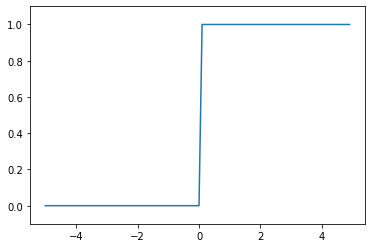

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()

3.2.4 시그모이드 함수 구현하기

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.exp(-x)는 exp(-x)에 해당한다.

In [7]:
x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [8]:
t=np.array([1.0,2.0,3.0])
1.0+t

array([2., 3., 4.])

In [9]:
1.0/t

array([1.        , 0.5       , 0.33333333])

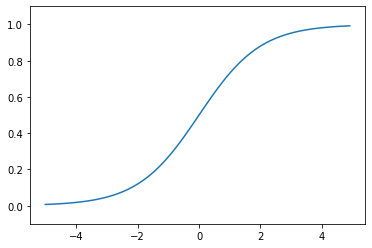

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

3.2.5 시그모이드 함수와 계단 함수 비교
시그모이드 함수의 부드러운 곡선 모양이 신경망 학습에서 중요한 역할을 한다.  
시그모이드는 0이상 1이하의 실수를 표현할 수 있다. 그러므로 신경망에서 연속적인 실수가 흐를 수 있다.  

계단함수와 시그모이드 함수의 공통점  
1) 입력이 작을 때는 출력이 0에 가깝고, 입력이 커지면 1에 가깝다.   
즉, 입력이 중요하면 큰 값 출력, 중요하지 않으면 작은 값 출력  
2) 비선형 함수  
-> 신경망에서는 비선형 함수를 사용해야한다. 선형함수를 사용하면 층을 많이 만들어도 하나의 층으로 만든 것과 차이가 없다.  
그러므로 다층 구조의 이점을 살리고 싶으면 비선형 함수를 이용해야 한다.

3.2.7 ReLU 함수

입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하면 0을 출력하는 함수  
Rectified '정류된' 

3장에서는 시그모이드 함수를 활성화 함수로 사용하지만, 책 후반부에서는 주로 ReLU 함수 사용한다.  
-> 내가 추측한 것 중요한 것에 더 큰 가중치를 주고 싶을 때 ReLU를 쓰기 때문일 것이라고 생각함  
시그모이드 함수르 이용하면 출력값이 0~1 사이기 때문 

In [15]:
def relu(x):
    return np.maximum(0, x)

3.3.1 다차원 배열

In [19]:
import numpy as np
A = np.array([1,2,3,4])
np.ndim(A)
A.shape
A.shape[0]

4

ndim()이라는 메서드로 배열의 차원수 확인 가능  
shape이라는 메서드로 배열의 형태 확인 가능(튜플로 반환) ex) (3,2) 3 by 2 행렬

In [22]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [32]:
import numpy as np
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [33]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [35]:
C = np.array([[1,2], [3,4]])
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

dot()이라는 메서드는 행렬의 곱. 즉, 내적을 해준다.  
곱 순서에 따라 결과가 다르게 나올 수 있다.   
행렬의 곱셈 시 둘의 크기를 적절히 조절하지 않으면 내적이 되지 않는다.  
ex) A: N*M 행렬, B: M*K 행렬 -> A*B = N*K 행렬  
A: 2(dim 0) * 3(dim 1)  C: 2(dim 0) * 2(dim1)  
위 코드는 A의 1번째 차원과 C의 0번째 차원의 원소 수가 다르므로 오류가 난다.  

In [36]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

3.3.3 신경망의 내적

In [39]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X, W)

3.4 3층 신경망 구현하기  

In [44]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape)  # (2, )
print(B1.shape) # (3, )

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)


항등함수는 입력을 그대로 하는 함수  

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.  
예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수 사용

3.4.3 구현 정리

In [46]:
def init_network():                                                 # 가중치와 편향 초기화
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):                                        # 입력 신호를 출력으로 변환하는 과정
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) +b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


3.5 출력층 설계하기

신경망은 분류와 회귀에 모두 이용 가능  
일반적으로 회귀에는 항등함수, 분류에는 소프트맥스 사용  
기계학습 문제는 분류와 회귀로 나뉜다.

In [48]:
# 3.5.2 소프트맥스 함수 구현 시 주의점
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))


C:\Users\bmc05\AppData\Local\Temp\ipykernel_26048\1733118607.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\bmc05\AppData\Local\Temp\ipykernel_26048\1733118607.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

그냥 구현해버리면 오버플로가 일어나 제대로 계산 안된다.
입력 신호 중 최댓값을 빼주면 올바르게 계산할 수 있다.

In [50]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [51]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

소프트맥스 함수 출력의 총합은 1이다. -> '확률'로 해석 가능해서 중요한 성질이다.  
소프트맥스 함수를 사용해도 각 원소의 대소 관계는 변하지 않는다.

In [21]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

3.5.4 출력층의 뉴련 수 정하기  
출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.  
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.  

3.6 손글씨 숫자 인식  
추론과정을 신경망의 순전파 라고도 한다.

In [5]:
# 3.6.1 MINIST 데이터 셋 -> 기계학습 분야에서 아주 유명한 데이터 셋

import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [15]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)            # (784, )
img = img.reshape(28, 28)   # 원래 이미지의 모양으로 변형
print(img.shape)            # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [17]:
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) =\
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

pickle 이라느 모듈을 설치하지 않고 책에 있는 그대로 하면 오류가 난다.  
pickle은 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능  
저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다.  

In [22]:
x, t =get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt +=1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


데이터 특정 범위로 변환하는 처리를 정규화라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라 한다.  
전체 데이터를 균일하게 분포시키는 데이터 백색화 등도 있다.

3.6.3 배치 처리

In [27]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape
x[0].shape
W1.shape
W2.shape
W3.shape

(100, 10)

하나로 묶은 입력 데이터를 배치라 한다.
배치 처리는 컴퓨터로 계산할 때 좋다.
1) 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있다.
2) 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있다.
(느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아진다.)

In [28]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
